###Bibliotecas

In [ ]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

###Conjunto de dados usado está disponível em:


https://www.kaggle.com


####Para pesquisas e estudos os arquivos de Tweets são requisitados através de API - "Application Programming Interface"

In [ ]:
dataset = pd.read_csv('drive/My Drive/Tweets_Mg.csv',encoding='utf-8')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [ ]:
dataset.head(3)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Expande o tamanho de exibição da coluna de texto. #
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

In [ ]:
# Eliminando dados duplicados. #
dataset.drop_duplicates(['Text'],inplace=True)

In [ ]:
# Verificando a contagem dos dados. #
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

####Eliminando as colunas sem nome.

In [ ]:
for i in dataset.columns.values:
    if i.startswith('Unnamed'):
        dataset.drop(i, axis=1, inplace=True)
        print ('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [ ]:
# Visualizando as colunas do conjunto de dados. #
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

#### Os arquivos de Tweets são usados para a pesquisa de sentimentos e são classificados como positivo, negativo e neutro.
####Nota: Todas as redes sociais são utilizadas para pesquisas de opinião sobre produtos e serviços.
####Outro uso frequente está relacionado a reação das pessoas ao noticiário político.

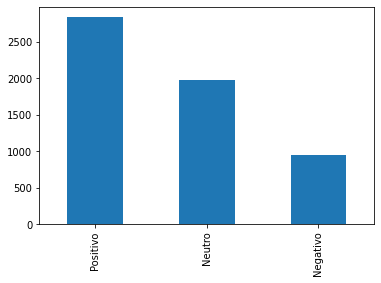

In [ ]:
# Verificando a classificação do arquivo previamente classificado #
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

####Processamento de texto.

In [ ]:
tweets = dataset['Text']
classes = dataset['Classificacao']

In [ ]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)

In [ ]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [ ]:
freq_tweets.shape

(5765, 13029)

In [ ]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
modelo = MultinomialNB() # O modelo usou o parâmetro alpha = 1 #
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Define frases para teste dentro de uma lista. #
testes = ['Gosto de chocolate',
          'Estes cogumelos são comestíveis',
          'Gosto de viajar',
          'Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',]
          

In [ ]:
# Transforma os dados de teste em vetores de palavras. #
freq_testes = vectorizer.transform(testes)

In [ ]:
# Classificação com o modelo treinado. #
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Gosto de chocolate, Neutro
Estes cogumelos são comestíveis, Positivo
Gosto de viajar, Neutro
Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro


In [ ]:
# Probabilidades de classe. #
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.27, 0.44, 0.29],
       [0.02, 0.13, 0.85],
       [0.39, 0.41, 0.21],
       [0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01]])

In [ ]:
# Validação cruzada do modelo. #
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10) # Validação cruzada - cv=10. #

In [ ]:
# Resultado da validação cruzada - parâmetros alpha = 1 e cv=10. #
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


In [ ]:
# Verificando as métricas do modelo com os parâmetro alpha = 1  e cv=10 #
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cria uma lista com o parâmetro alpha variando entre 1 e 10 #
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
parametros_grid = dict(alpha=lista_alpha)

In [ ]:
nvModelo = MultinomialNB()

In [ ]:
grid = GridSearchCV(nvModelo, parametros_grid, cv=10, scoring='accuracy')

In [ ]:
freq_tweets = vectorizer.fit_transform(tweets)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.01548645, 0.01562812, 0.01534214, 0.01562512, 0.01589468,
        0.01776278, 0.01625695, 0.01546531, 0.01515522, 0.01535134]),
 'mean_score_time': array([0.00103798, 0.00101519, 0.00101998, 0.00103898, 0.00100367,
        0.00114858, 0.00112832, 0.00099838, 0.00099823, 0.0010123 ]),
 'mean_test_score': array([0.86648463, 0.86439889, 0.86196924, 0.85537593, 0.84965007,
        0.85779114, 0.8539756 , 0.84027958, 0.83785083, 0.83177715]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha': 9},
  {'alpha': 10}],
 'rank_test_score': array([ 1,  2,  3,  5,  7,  4,  6,  8,  9, 10], dtype=int32),
 'split0_test_score': array([0.50259965, 0.5043

In [ ]:
# Verificando o melhor parâmetro alpha #
grid.best_params_

{'alpha': 1}

In [ ]:
grid.best_score_

0.8664846307529368

In [ ]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB(alpha=5) # Usando alpha = 5 # - # No primeiro modelo foi usado alpha = 1 #
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

In [ ]:
freq_testes = vectorizer.transform(testes)

In [ ]:
# Classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Positivo', 'Positivo', 'Positivo', 'Neutro', 'Neutro', 'Negativo',
       'Neutro'], dtype='<U8')

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
# Verificando as métricas do modelo com os parâmetro alpha = 5  e cv=10 #
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.89      0.92      0.90      2840
    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



In [ ]:
import nltk
import re
from nltk.corpus import wordnet
import nltk


In [ ]:
frase = 'Os sábios não dizem o que sabem,'; frase

'Os sábios não dizem o que sabem,'

In [ ]:
frase1 = ' os tolos não sabem o que dizem.'

In [ ]:
frase + frase1

'Os sábios não dizem o que sabem, os tolos não sabem o que dizem.'

In [ ]:
['Segunda','Terça','Quarta'] + ['Quinta','Sexta','Sábado']

['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']

In [ ]:
lista = ['Segunda','Terça','Quarta']
lista.append('Quinta-feira')
lista

['Segunda', 'Terça', 'Quarta', 'Quinta-feira']

In [ ]:
frase1[0:31]

' os tolos não sabem o que dizem'

In [ ]:
lista[3:8]

['Quinta-feira']

In [ ]:
len(lista)

4

In [ ]:
frase2='Amar é sonhar, sonhar é viver, viver é curtir, curtir é amar.'
frase2 = frase2.lower()
frase2.count('amar')

2

In [ ]:
len(frase2)

61

In [ ]:
frase1.index('tolos')

4

In [ ]:
frase1[0:3]

' os'

In [ ]:
frase2[14:30]

' sonhar é viver,'

In [ ]:
lista = ['hot','dog']
' '.join(lista)

'hot dog'

In [ ]:
# Excluindo números de uma frase. #
texto = 'O número do prédio  56, apto 306'
re.sub('[-|0-9]',' ', texto)

'O número do prédio    , apto    '

In [ ]:
len(texto)

32

In [ ]:
texto = "A close mounth!!!,catches no flies ??;;;()"
re.sub(r'[-./?!,":;()\']',' ',texto)

'A close mounth    catches no flies        '

In [ ]:
import nltk
nltk.download('punkt')
frase3 = 'Behind every great man there is a great woman'
palavras = nltk.word_tokenize(frase)
palavras

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Os', 'sábios', 'não', 'dizem', 'o', 'que', 'sabem', ',']

In [ ]:
from nltk import FreqDist
frequencia = FreqDist(['Amar', 'é','sonhar', 'sonhar', 'é', 'viver', 'viver', 'é','curtir', 'curtir', 'é', 'amar'])
frequencia

FreqDist({'Amar': 1, 'amar': 1, 'curtir': 2, 'sonhar': 2, 'viver': 2, 'é': 4})

In [ ]:
print (frequencia.values())

dict_values([1, 4, 2, 2, 2, 1])


In [ ]:
frequencia.max()

'é'

In [ ]:
frequencia.items()

dict_items([('Amar', 1), ('é', 4), ('sonhar', 2), ('viver', 2), ('curtir', 2), ('amar', 1)])

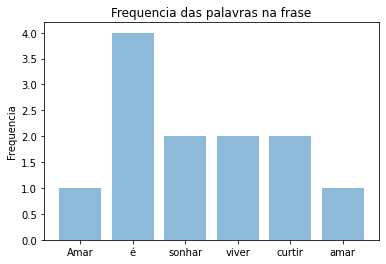

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

palavras = frequencia.keys()
y_pos = np.arange(len(palavras))
contagem = frequencia.values()

plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()



In [ ]:
# Stemming em Português
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
stemmer.stem('Trabalhou')
stemmer.stem('Trabalhava')
stemmer.stem('Trabalha')

'trabalh'

In [ ]:
stemmer.stem('Carro')
stemmer.stem('correu')
stemmer.stem('corrida')

'corr'

In [ ]:
#Stemming em Inglês
stemmer = nltk.stem.SnowballStemmer("english")

In [ ]:
stemmer.stem('running')
stemmer.stem('run')

'run'

In [ ]:
stemmer.stem('have')
stemmer.stem('having')

'have'

In [ ]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [ ]:
Stemming('Ele trabalhava frequentemente no projeto de novos produtos')

'ele trabalh frequ no projet de nov produt'

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print (lemmatizer.lemmatize("cats"))

cat


In [ ]:
# Busca um lemma para 'is' do tipo verbo
lemmatizer.lemmatize('is', pos='v')

'be'

In [ ]:
lemmatizer.lemmatize('are', pos='v')

'be'

In [ ]:
# Busca um adjetivo para 'better'
print (lemmatizer.lemmatize("better", pos="a"))

good


In [ ]:
print (lemmatizer.lemmatize("running", pos="n"))

running


In [ ]:
print (lemmatizer.lemmatize("running", pos="a"))

running


In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords

In [ ]:
def RemoviStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
sentenca1 = 'Ele trabalhava frequentemente no projeto de criação de novos produtos'

In [ ]:
RemoviStopWords(sentenca1)

'trabalhava frequentemente projeto criação novos produtos'

In [ ]:
sentenca2 = 'Ele estuda pensando em soluções para a industria 4.0'

In [ ]:
RemoviStopWords(sentenca2)

'estuda pensando soluções industria 4.0'

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
text = nltk.word_tokenize('Os indivíduos diferem na habilidade de entender ideias complexas.')
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


[('Os', 'NNP'),
 ('indivíduos', 'NN'),
 ('diferem', 'NN'),
 ('na', 'TO'),
 ('habilidade', 'VB'),
 ('de', 'FW'),
 ('entender', 'FW'),
 ('ideias', 'NNS'),
 ('complexas', 'VBP'),
 ('.', '.')]

In [ ]:
text = nltk.word_tokenize('João Comprou um presente muito legal')
nltk.pos_tag(text)

[('João', 'NNP'),
 ('Comprou', 'NNP'),
 ('um', 'JJ'),
 ('presente', 'NN'),
 ('muito', 'FW'),
 ('legal', 'JJ')]

In [ ]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [ ]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [ ]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [ ]:
nltk.help.upenn_tagset('FW')

FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...


In [ ]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [ ]:
nltk.help.upenn_tagset('NNS')

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [ ]:
nltk.help.upenn_tagset('VBP')

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [ ]:
text = nltk.word_tokenize("Behind every great man there is a great woman")
nltk.pos_tag(text)

[('Behind', 'IN'),
 ('every', 'DT'),
 ('great', 'JJ'),
 ('man', 'NN'),
 ('there', 'EX'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('woman', 'NN')]

In [ ]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [ ]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [ ]:
nltk.help.upenn_tagset('EX')

EX: existential there
    there


In [ ]:
nltk.help.upenn_tagset('VBZ')

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


In [ ]:
from nltk.corpus import wordnet
wordnet.synsets('bike')

[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [ ]:
wordnet.synset('bicycle.n.01').definition()

'a wheeled vehicle that has two wheels and is moved by foot pedals'

In [ ]:
wordnet.synset('motorcycle.n.01').definition()

'a motor vehicle with two wheels and a strong frame'

In [ ]:
# Hiponimos da palavra 'bicycle'.
# Conceitos mais específicos.
wordnet.synset('bicycle.n.01').hyponyms()

[Synset('bicycle-built-for-two.n.01'),
 Synset('mountain_bike.n.01'),
 Synset('ordinary.n.04'),
 Synset('push-bike.n.01'),
 Synset('safety_bicycle.n.01'),
 Synset('velocipede.n.01')]

In [ ]:
# Hiperonimos da palavra 'bicycle'
# Conceitos mais genéricos
wordnet.synset('bicycle.n.01').hypernyms()

[Synset('wheeled_vehicle.n.01')]

In [ ]:
# Meronyms da palavra 'bicycle'
# Conceitos partes de outros conceitos
wordnet.synset('bicycle.n.01').part_meronyms()

[Synset('bicycle_seat.n.01'),
 Synset('bicycle_wheel.n.01'),
 Synset('chain.n.03'),
 Synset('coaster_brake.n.01'),
 Synset('handlebar.n.01'),
 Synset('kickstand.n.01'),
 Synset('mudguard.n.01'),
 Synset('pedal.n.02'),
 Synset('sprocket.n.02')]

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
frases = TextBlob("Python é uma ótima linguagem para ciência de dados")

In [ ]:
frases.tokens

WordList(['Python', 'é', 'uma', 'ótima', 'linguagem', 'para', 'ciência', 'de', 'dados'])

In [ ]:
frases.sentences

[Sentence("Python é uma ótima linguagem para ciência de dados")]

In [ ]:
frases.detect_language()

'pt'

In [ ]:
frases.translate(to='en')

TextBlob("Python is a great language for data science")

In [ ]:
frases.translate(from_lang='pt',to='es')

TextBlob("Python es un gran lenguaje para la ciencia de datos")

In [ ]:
frase4 = TextBlob('I havv othyr idea, ok !! comi on')

In [ ]:
frase4.correct()

TextBlob("I have other idea, ok !! come on")

In [ ]:
frase = TextBlob("Python is a great language for Data Science")
frase.ngrams(n=2)

[WordList(['Python', 'is']),
 WordList(['is', 'a']),
 WordList(['a', 'great']),
 WordList(['great', 'language']),
 WordList(['language', 'for']),
 WordList(['for', 'Data']),
 WordList(['Data', 'Science'])]

In [ ]:
frase = TextBlob("Python is a great language for Data Science")
frase.ngrams(n=3)

[WordList(['Python', 'is', 'a']),
 WordList(['is', 'a', 'great']),
 WordList(['a', 'great', 'language']),
 WordList(['great', 'language', 'for']),
 WordList(['language', 'for', 'Data']),
 WordList(['for', 'Data', 'Science'])]

In [ ]:
frase = TextBlob("Python é uma ótima linguagem")

In [ ]:
frase.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
frase = TextBlob("Eu gosto de chocolate")

In [ ]:
frase.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
frase = TextBlob("Python is a terrible language!")
frase.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
frase = TextBlob("Python is a great language for Data Science.", analyzer=NaiveBayesAnalyzer())
frase.sentiment

Sentiment(classification='pos', p_pos=0.6635684561319586, p_neg=0.33643154386804197)

####Exemplo - Classificação de noticias. - Fake News.

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
# Exemplo de clasificação de notícias. #
news = pd.read_csv('drive/My Drive/news.csv', sep=',', header=None)

In [ ]:
news.head()

,0
0,O capitão américa aparece sobrevoando São Paulo e diz que irá se candidatar;verdadeiro
1,A polarização da população gera guerra civil;fake_news
2,O Chaves se pronuncia e diz está indignado com tanta mentira.;verdadeiro
3,Morte do precidenciavel X por acidente de aviao;verdadeiro
4,Monumento de Brasilia é atacado por manifestantes e eleicoes seráo canceladas;fake_news


In [ ]:
news.values

array([['O capitão américa aparece sobrevoando São Paulo e diz que irá se candidatar;verdadeiro'],
       ['A polarização da população gera guerra civil;fake_news'],
       ['O Chaves se pronuncia e diz está indignado com tanta mentira.;verdadeiro'],
       ['Morte do precidenciavel X por acidente de aviao;verdadeiro'],
       ['Monumento de Brasilia é atacado por manifestantes e eleicoes seráo canceladas;fake_news'],
       ['Novo presidente se diz confiante para governar o pais;verdadeiro'],
       ['Jair Bolsonaro sobe no ranking de rejeicao no nordeste;verdadeiro'],
       ['Haddad melhora nas pesquisas apos apoio de Lula;verdadeiro'],
       ['Disputa no segundo turno está cada vez mais acirrada entre os extremos;verdadeiro'],
       ['Amoedo declara apoio ao PT;fake_news'],
       ['Manifestantes em Sao Paulo param avenida pedem intervençao militar!;fake_news'],
       ['Padre Marcelo Rossi diz que irá se candidatar a presidencia;fake_news'],
       ['Ex presidente Lula consegue 

####Processamento de texto.

In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install fuzzywuzzy[speedup]

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

####Consultando o resultado com o método - "ratio"

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'Doença Cardiovascular'
fuzz.ratio(s1,s2)

100

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'Doença Cardiovasculhar'
fuzz.ratio(s1,s2)

98

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'doença Cardiovascular'
fuzz.ratio(s1,s2)

95

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'Doença Cardiovascular!!'
fuzz.ratio(s1,s2)

95

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = '###$$%$!Doença Cardiovascular#$#%#ˆˆˆˆˆ!!'
fuzz.ratio(s1,s2)

68

####Consultando o resultado com o método - "partial"

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = '###$$%$!Doença Cardiovascular#$#%#ˆˆˆˆˆ!!'
fuzz.partial_ratio(s1,s2)

100

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = '###$$%$!Doença Cardiovasculhar#$#%#ˆˆˆˆˆ!!'
fuzz.partial_ratio(s1,s2)

95

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'Cardiovascular Doença'
fuzz.partial_ratio(s1,s2)

67

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'Cardiovascular Doença'
fuzz.partial_token_sort_ratio(s1,s2)

100

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = 'cardiovascular doença'
fuzz.partial_token_sort_ratio(s1,s2)

100

In [ ]:
s1 = 'Doença Cardiovascular'
s2 = '%%%%%cardiovascular doença&&&&****@@@'
fuzz.partial_token_sort_ratio(s1,s2)

100

####Abrindo o arquivo "SentiLex-lem-PT01.txt', 'r')" para leitura da polaridade das palavras. #

In [ ]:
sentilexpt = open('drive/My Drive/SentiLex-PT01/SentiLex-lem-PT01.txt','r')

In [ ]:
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posição do caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionário com a palavra e polaridade

In [ ]:
print (dic_palavra_polaridade)

{'\ufeffabafado': '-1', 'abafante': '-1', 'abaixado': '-1', 'abalado': '-1', 'abalizado': '1', 'abandalhado': '-1', 'abandonado': '-1', 'abarcante': '-1', 'abarrotado': '-1', 'abastado': '1', 'abastecido': '0', 'abatido': '-1', 'abelhudo': '-1', 'abençoado': '1', 'aberrante': '-1', 'aberrativo': '-1', 'aberto': '1', 'abespinhado': '-1', 'abestalhado': '-1', 'abilolado': '-1', 'abismado': '-1', 'abismal': '-1', 'abjecto': '-1', 'abjeto': '-1', 'abnegado': '1', 'abobado': '-1', 'abobalhado': '-1', 'abolicionista': '0', 'abolido': '-1', 'abominador': '-1', 'abominando': '-1', 'abominável': '-1', 'abonado': '1', 'abonatório': '1', 'abonecado': '0', 'aborígene': '-1', 'aborrecido': '-1', 'abortado': '-1', 'abraçado': '1', 'abrangente': '-1', 'abrangido': '-1', 'abrasileirado': '0', 'abrigado': '0', 'abrilhantado': '1', 'abrupto': '-1', 'abrutalhado': '-1', 'absentista': '-1', 'absolutista': '0', 'absoluto': '0', 'absolvido': '0', 'absorto': '-1', 'absorvente': '1', 'abstémico': '1', 'abstém

In [ ]:
print (dic_palavra_polaridade.get('abusivo'))

-1


In [ ]:
print (dic_palavra_polaridade.get('sorridente'))

1


In [ ]:
print (dic_palavra_polaridade.get('liberal'))

0


In [ ]:
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
    print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    if score > 0:
        return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    elif score == 0:
        return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    else:
        return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'

In [ ]:
Score_sentimento('Eu estou muito feliz hoje, porém, triste com a política')

[0, 0, 0, 1, 0, 0, -1, 0, 0, 0]


'Neutro, Score:0'

In [ ]:
dic_palavra_polaridade.get('feliz')

'1'

In [ ]:
Score_sentimento('Estou Muito Feliz hoje,super animado com o trabalho novo! :)')

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0]


'Positivo, Score:2'

In [ ]:
dic_palavra_polaridade.get('animado')

'1'

In [ ]:
Score_sentimento('Estou muito triste, desanimado com algumas coisas')

[0, 0, 0, -1, 0, 0, 0]


'Negativo, Score:-1'

In [ ]:
dic_palavra_polaridade.get('triste')

'-1'

####Nos sistemas para reconhecimento de voz o processo é semelhante.

#### Exemplo de robô Python "Backend"  -  Globo Esporte - Numerologos.


https://globoesporte.globo.com/numerologos/

####Exemplo de robô Python "Backend"  -  ChatBots for Senior People and Patients with Alzheimer’s Disease


http://endurancerobots.com/azbnmaterial/a-robot-companion-for-senior-people-and-patients-with-alzheimer-s-disease/

####Referências.

https://trieengenharia.com/5-motivos-para-usar-python-na-industria-4-0/

https://www.nltk.org


https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

http://www.nilc.icmc.usp.br/nilc/tools/corpora.htm

http://comet.fflch.usp.br

https://pypi.org/project/fuzzywuzzy/

http://b2find.eudat.eu/dataset/b6bd16c2-a8ab-598f-be41-1e7aeecd60d3